In [1]:
setwd('D:/Workspace/R/data')

In [2]:
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
df = read.csv('sale_data.csv')

In [4]:
head(df)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [5]:
summary(df)

       X                YM               CATEGORY     ITEM_CNT    
 Min.   :  1.00   Min.   :200901   과즙음료  :60   Min.   : 1.00  
 1st Qu.: 45.75   1st Qu.:201004   비타민음료:60   1st Qu.:14.00  
 Median : 90.50   Median :201107   차음료    :60   Median :43.00  
 Mean   : 90.50   Mean   :201107                   Mean   :39.57  
 3rd Qu.:135.25   3rd Qu.:201209                   3rd Qu.:57.00  
 Max.   :180.00   Max.   :201312                   Max.   :83.00  
      QTY             PRICE         MAXTEMP         SALEDAY      
 Min.   :  27.0   Min.   :1229   Min.   :-1.00   Min.   :113399  
 1st Qu.: 814.5   1st Qu.:1424   1st Qu.: 9.75   1st Qu.:143047  
 Median :1734.0   Median :1762   Median :19.50   Median :179564  
 Mean   :1685.7   Mean   :1915   Mean   :17.55   Mean   :181596  
 3rd Qu.:2387.2   3rd Qu.:2347   3rd Qu.:27.00   3rd Qu.:224721  
 Max.   :3992.0   Max.   :3251   Max.   :31.00   Max.   :245068  
    RAIN_DAY        HOLIDAY    
 Min.   :    0   Min.   : 8.0  
 1st Qu.: 2750   

In [6]:
product1 = df %>% filter(df$CATEGORY == '과즙음료')
product2 = df %>% filter(df$CATEGORY == '비타민음료')
product3 = df %>% filter(df$CATEGORY == '차음료')

idx=sample(1:nrow(product1), size=nrow(product1)*0.7, replace = F)
product1_train = product1[idx, ]
product1_test = product1[-idx, ]

product2_train = product2[idx, ]
product2_test = product2[-idx, ]

product3_train = product3[idx, ]
product3_test = product3[-idx, ]

In [7]:
head(product1)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [8]:
pd1 = lm(QTY~PRICE+MAXTEMP+SALEDAY+RAIN_DAY+HOLIDAY, data=product1_train)
summary(pd1)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, 
    data = product1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-368.18 -191.52   12.71  138.43  506.73 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.555e+03  6.375e+02  -4.007 0.000295 ***
PRICE        6.338e-01  1.446e-01   4.382 9.74e-05 ***
MAXTEMP      5.367e+01  5.003e+00  10.728 9.20e-13 ***
SALEDAY      1.092e-02  1.229e-03   8.883 1.33e-10 ***
RAIN_DAY    -5.587e-03  4.841e-03  -1.154 0.256114    
HOLIDAY      7.521e+00  3.059e+01   0.246 0.807174    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 234.5 on 36 degrees of freedom
Multiple R-squared:  0.8635,	Adjusted R-squared:  0.8446 
F-statistic: 45.56 on 5 and 36 DF,  p-value: 1.389e-14


In [9]:
pd1 = lm(QTY~PRICE+MAXTEMP+SALEDAY+RAIN_DAY, data=product1_train)
summary(pd1)


Call:
lm(formula = QTY ~ PRICE + MAXTEMP + SALEDAY + RAIN_DAY, data = product1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-357.89 -192.63    6.67  140.82  508.29 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.488e+03  5.690e+02  -4.372 9.62e-05 ***
PRICE        6.336e-01  1.428e-01   4.438 7.89e-05 ***
MAXTEMP      5.371e+01  4.936e+00  10.883 4.35e-13 ***
SALEDAY      1.095e-02  1.208e-03   9.063 6.24e-11 ***
RAIN_DAY    -5.605e-03  4.779e-03  -1.173    0.248    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.5 on 37 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.8485 
F-statistic: 58.42 on 4 and 37 DF,  p-value: 1.74e-15


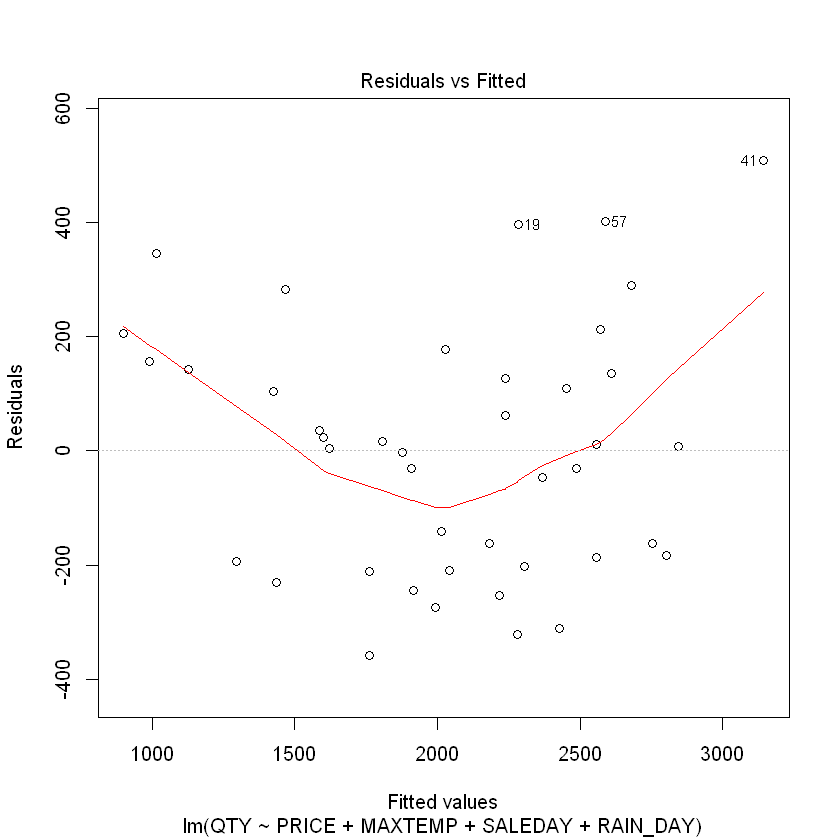

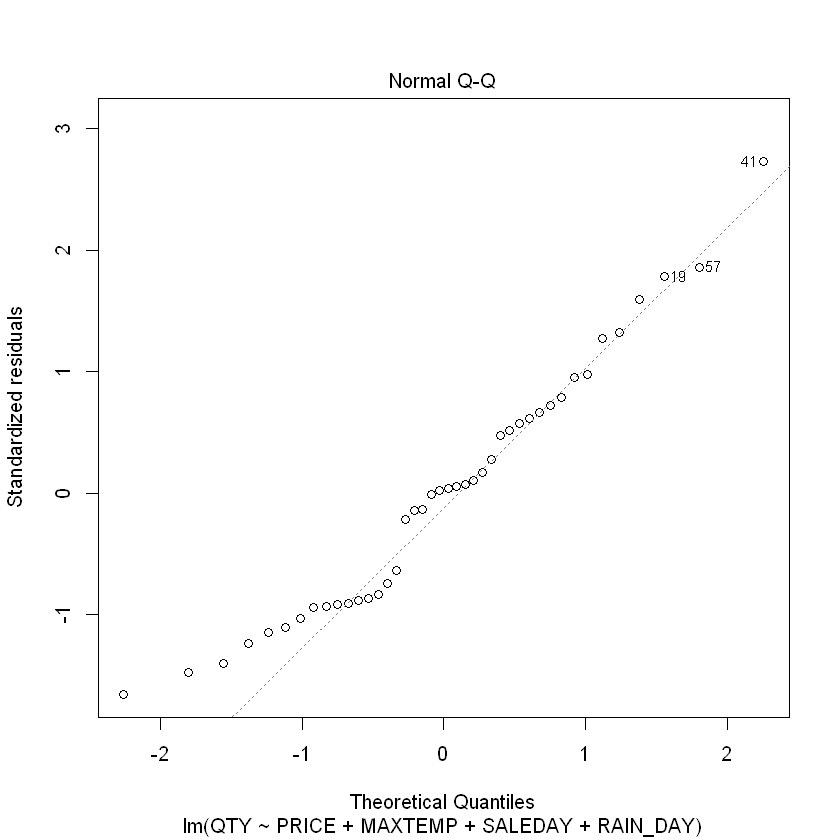

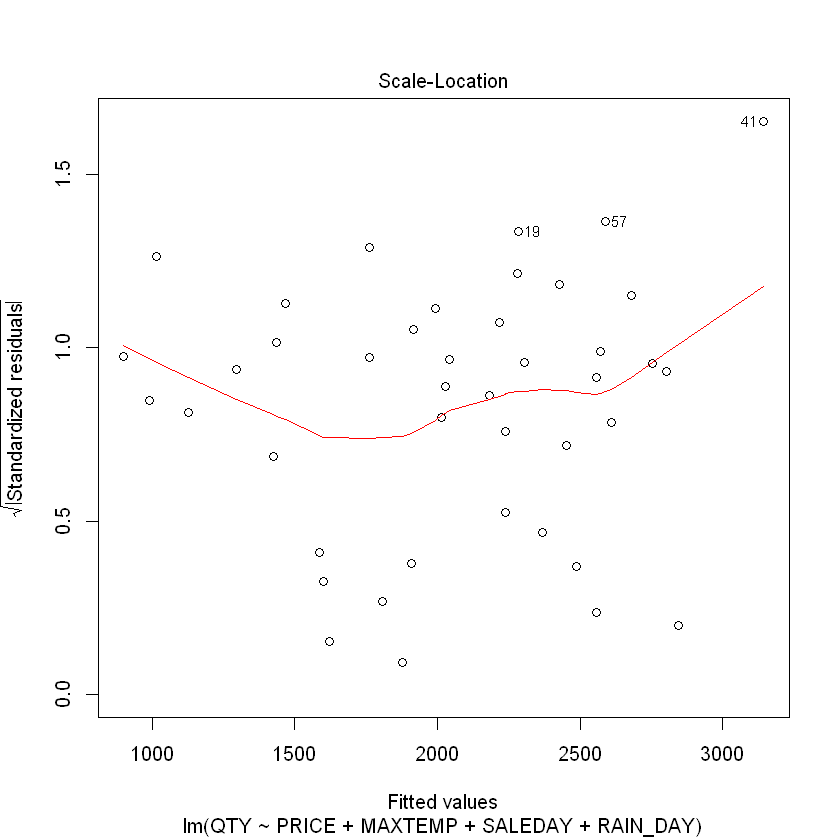

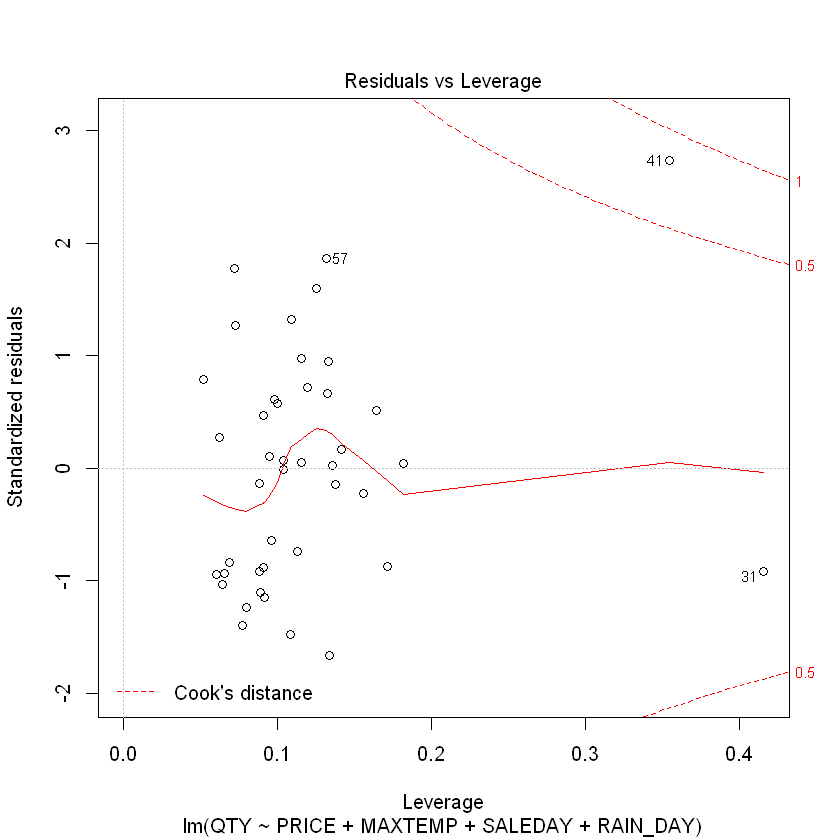

In [10]:
plot(pd1)

In [11]:
pd2 = lm(QTY~SALEDAY+RAIN_DAY, data=product2_train)
summary(pd2)


Call:
lm(formula = QTY ~ SALEDAY + RAIN_DAY, data = product2_train)

Residuals:
   Min     1Q Median     3Q    Max 
-360.3 -157.5  -69.8  130.1  465.4 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.740e+02  1.440e+02  -3.987 0.000285 ***
SALEDAY      5.523e-03  7.689e-04   7.182 1.21e-08 ***
RAIN_DAY     1.524e-02  3.231e-03   4.719 3.03e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.8 on 39 degrees of freedom
Multiple R-squared:  0.6696,	Adjusted R-squared:  0.6527 
F-statistic: 39.52 on 2 and 39 DF,  p-value: 4.182e-10


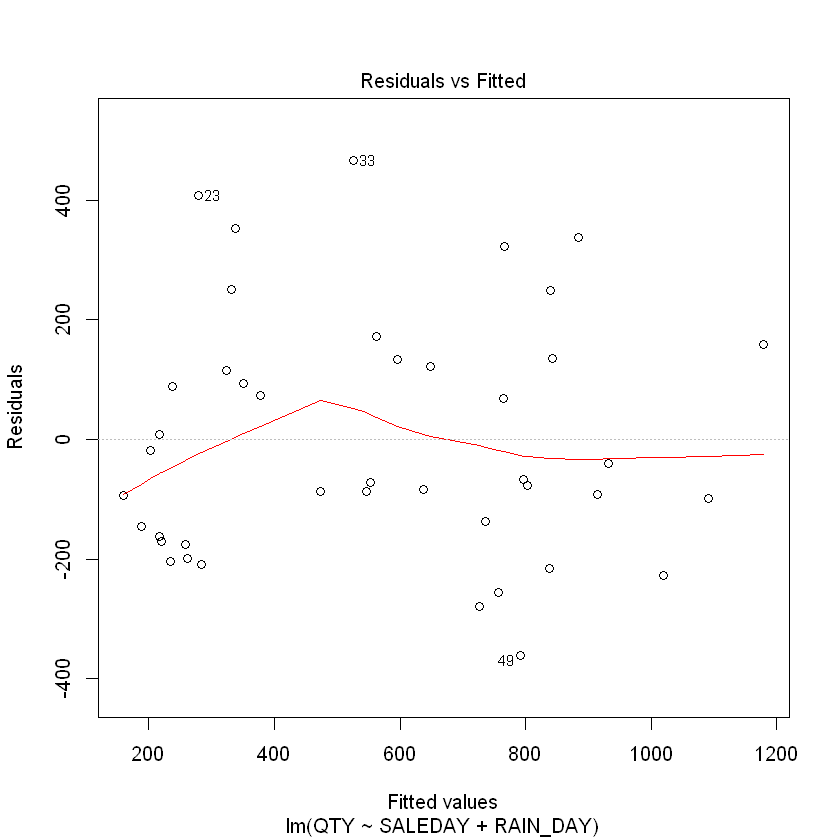

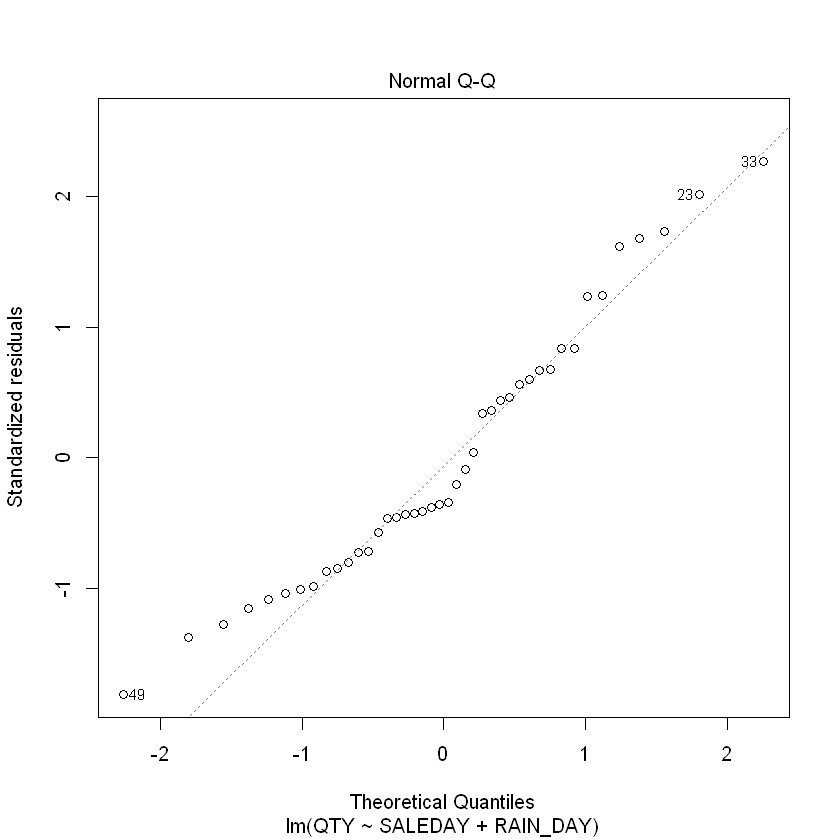

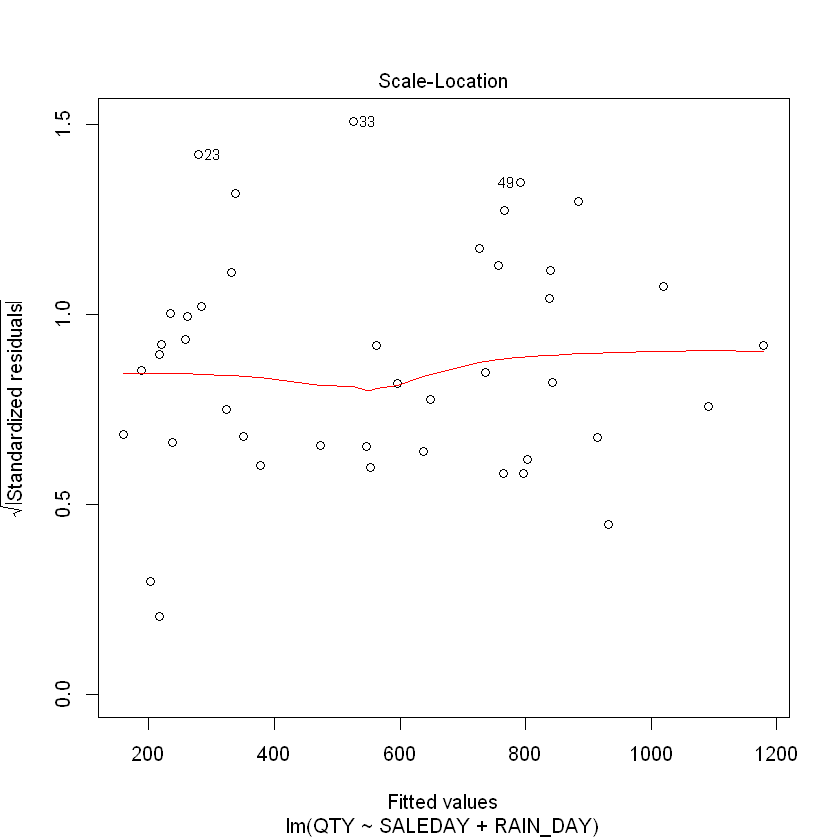

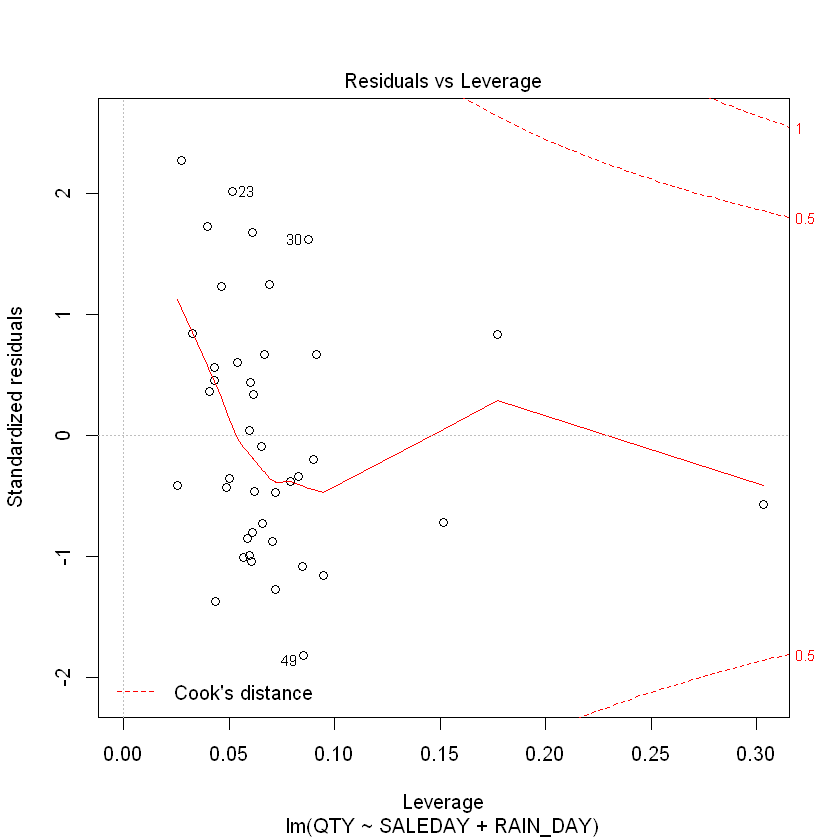

In [12]:
plot(pd2)

In [13]:
pd3 = lm(QTY~MAXTEMP+SALEDAY, data=product3_train)
summary(pd3)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = product3_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-421.75 -157.64   -7.46  103.60  962.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.800e+02  1.941e+02  -0.928    0.359    
MAXTEMP      4.477e+01  3.987e+00  11.228 8.72e-14 ***
SALEDAY      9.902e-03  9.362e-04  10.576 5.12e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 252.3 on 39 degrees of freedom
Multiple R-squared:  0.847,	Adjusted R-squared:  0.8392 
F-statistic:   108 on 2 and 39 DF,  p-value: < 2.2e-16


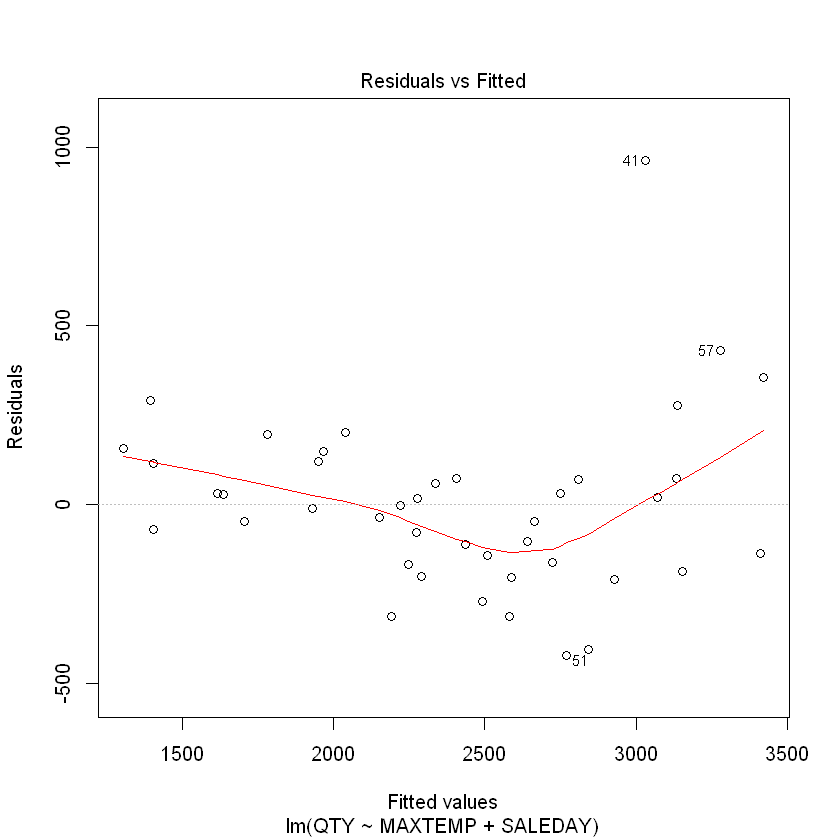

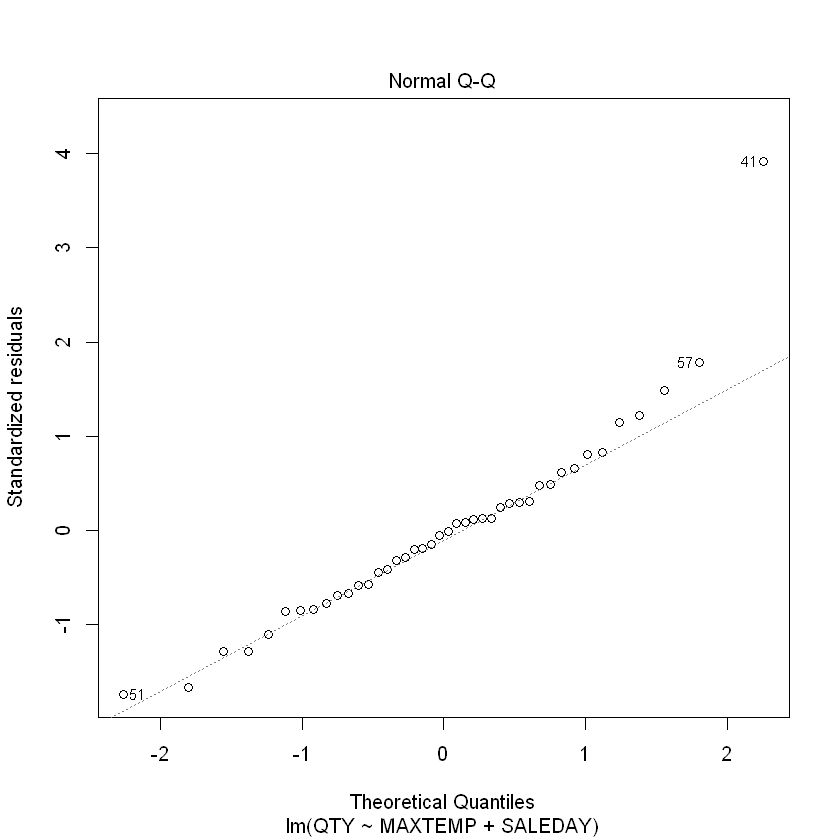

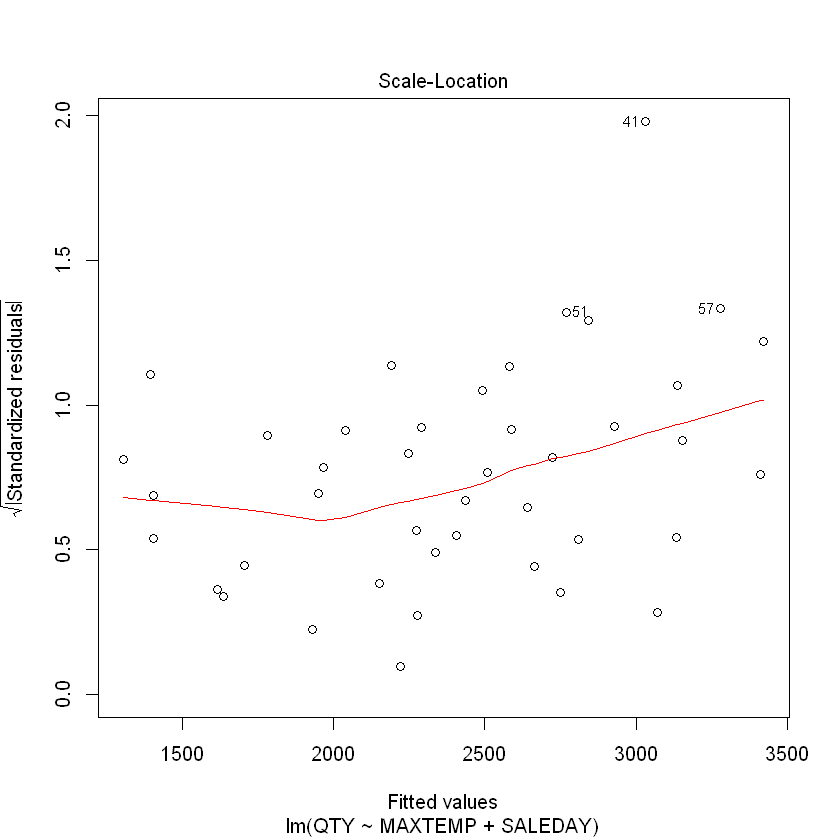

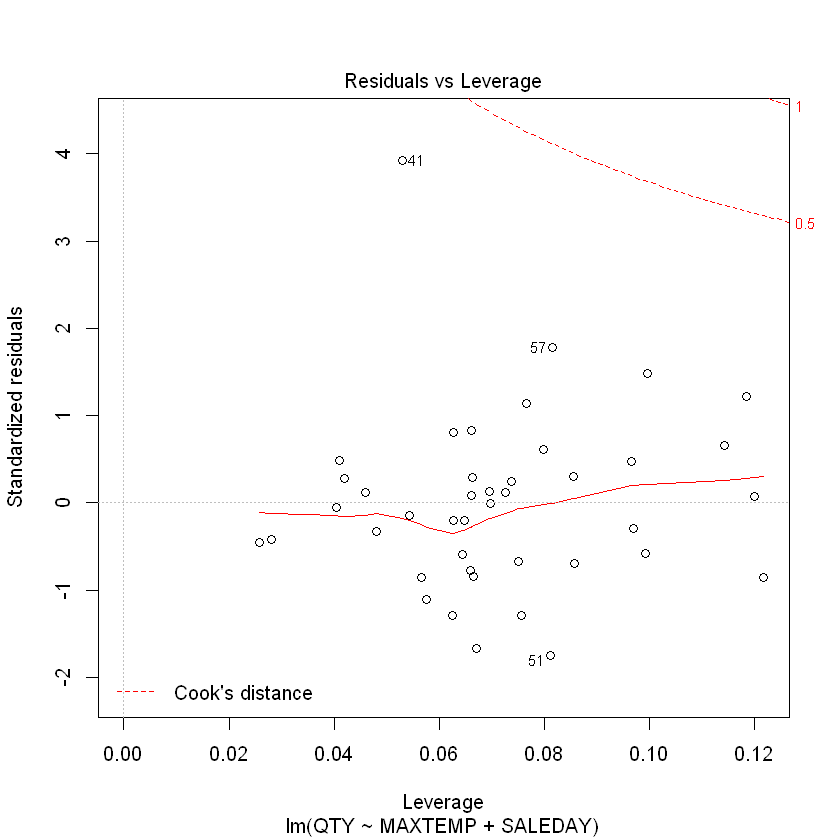

In [14]:
plot(pd3)

In [22]:
pd1.pred = predict(pd1, newdata=product1_test, interval = 'predict')

In [25]:
pd1.pred = as.data.frame(pd1.pred)

In [26]:
pd1.pred = cbind(pd1.pred, product1_test$QTY)

In [27]:
head(pd1.pred)

,fit,lwr,upr,product1_test$QTY
1,768.7359,259.1352,1278.337,990
2,924.4582,418.0260,1430.890,1199
4,1674.2778,1187.2239,2161.332,1326
7,2165.0453,1676.9078,2653.183,1663
15,1403.3714,920.4668,1886.276,1432
22,2067.9294,1583.6927,2552.166,2321


In [29]:
pd1.pred$tf[pd1.pred$'product1_test$QTY'>= pd1.pred$lwr & pd1.pred$'product1_test$QTY' <= pd1.pred$upr] = T

In [45]:
pd1.pred$tf= ifelse(pd1.pred$'product1_test$QTY'>= pd1.pred$lwr & pd1.pred$'product1_test$QTY' <= pd1.pred$upr, T, F)

In [46]:
pd1.pred

,fit,lwr,upr,product1_test$QTY,tf
1,768.7359,259.1352,1278.337,990,TRUE
2,924.4582,418.0260,1430.890,1199,TRUE
4,1674.2778,1187.2239,2161.332,1326,TRUE
7,2165.0453,1676.9078,2653.183,1663,FALSE
15,1403.3714,920.4668,1886.276,1432,TRUE
22,2067.9294,1583.6927,2552.166,2321,TRUE
24,1416.3813,928.5751,1904.188,1306,TRUE
28,2104.9803,1622.8337,2587.127,2200,TRUE
29,2499.6899,2011.4780,2987.902,3247,FALSE
32,2769.8962,2280.8644,3258.928,2765,TRUE


In [31]:
head(pd1.pred)

,fit,lwr,upr,product1_test$QTY,tf
1,768.7359,259.1352,1278.337,990,TRUE
2,924.4582,418.0260,1430.890,1199,TRUE
4,1674.2778,1187.2239,2161.332,1326,TRUE
7,2165.0453,1676.9078,2653.183,1663,NA
15,1403.3714,920.4668,1886.276,1432,TRUE
22,2067.9294,1583.6927,2552.166,2321,TRUE


In [33]:
pd1.pred$tf[is.na(pd1.pred$tf)] = F

In [37]:
sum(pd1.pred$tf == 'TRUE') / dim(pd1.pred)[1]

[1] 0.8888889

In [38]:
pd2.pred = predict(pd2, newdata=product1_test, interval = 'predict')
pd2.pred = as.data.frame(pd2.pred)
pd2.pred = cbind(pd2.pred, product2_test$QTY)
pd2.pred$tf[pd2.pred$'product2_test$QTY'>= pd2.pred$lwr & pd2.pred$'product2_test$QTY' <= pd2.pred$upr] = T
pd2.pred$tf[is.na(pd2.pred$tf)] = F

In [39]:
sum(pd2.pred$tf == 'TRUE') / dim(pd2.pred)[1]

[1] 0.8888889

In [41]:
pd3.pred = predict(pd3, newdata=product1_test, interval = 'predict')
pd3.pred = as.data.frame(pd3.pred)
pd3.pred = cbind(pd3.pred, product3_test$QTY)
pd3.pred$tf[pd3.pred$'product3_test$QTY'>= pd3.pred$lwr & pd3.pred$'product3_test$QTY' <= pd3.pred$upr] = T
pd3.pred$tf[is.na(pd3.pred$tf)] = F

In [43]:
pd3.pred

,fit,lwr,upr,product3_test$QTY,tf
1,1254.137,714.1221,1794.152,1346,TRUE
2,1345.750,807.4497,1884.050,1260,TRUE
4,1920.946,1394.2967,2447.595,2125,TRUE
7,2371.447,1841.2826,2901.612,2153,TRUE
15,1711.057,1185.9473,2236.167,1645,TRUE
22,2259.548,1740.7845,2778.312,2276,TRUE
24,1640.901,1112.5411,2169.262,1898,TRUE
28,2240.352,1723.2897,2757.414,2473,TRUE
29,2596.839,2078.6339,3115.043,2626,TRUE
32,2968.406,2443.6144,3493.197,2674,TRUE


In [42]:
sum(pd3.pred$tf == 'TRUE') / dim(pd3.pred)[1]

[1] 1

In [ ]:
pd1.pred

In [ ]:
product1_test

In [ ]:
both1 = step(out1, direction = 'both', trace = FALSE)
both2 = step(out2, direction = 'both', trace = FALSE)
both3 = step(out3, direction = 'both', trace = FALSE)

In [ ]:
summary(out1)

In [ ]:
summary(out2)

In [ ]:
summary(out3)

In [ ]:
anova(both1)

In [ ]:
anova(both2)

In [ ]:
anova(both3)

In [ ]:
par(mfrow = c(2,2))
plot(both1)

In [ ]:
par(mfrow = c(2,2))
plot(both2)

In [ ]:
par(mfrow = c(2,2))
plot(both3)

In [ ]:
# pred1 = product1 %>%
#   mutate(pred_QTY = -1854 + X * 18.47 + 16.46 * ITEM_CNT + 0.4013 * PRICE + 52.37 * MAXTEMP - 0.01127 * RAIN_DAY + 46.87 * HOLIDAY )

In [ ]:
a1 = predict(both1, product1, interval = 'predict')
a2 = cbind(a1, product1$QTY)
head(a2)
a2$pre[a2$'product1$QTY' > a2$lwr & a2$'product1$QTY' < a2$upr] = T
# a2$pre[is.na(a2$pre)] = F
# [a1$lwr < a2 && a2 < a1$upr]

In [ ]:
kk = as.data.frame(predict(both2, product2, interval = 'predict'))
cc = product2$QTY
kk = cbind(kk, cc)
kk$acc[kk$'cc' >= kk$lwr & kk$'cc' <= kk$upr] = T
kk$acc[is.na(kk$acc)] = F
head(kk)

In [ ]:
round(sum(kk$acc) / dim(kk)[1], 2)

In [ ]:
predict(both2, product2, interval = 'predict')

In [ ]:
library(forecast)

In [ ]:
a =meanf(product1$QTY, 30)

In [ ]:
summary(a)

In [ ]:
library(autoplot)

In [ ]:
autoplot(product1$QTY, product1$X)